# Stochastic processes code
## Gillespie Algorithm

* By solving the master equation the time evolution of the probability distribution can be calculated.
* Unfortunately, the master equation is very difficult to solve, either numerically or analytically.
* In most cases, we therefore do not aim to solve the master equation. Rather a trajectory of individual transitions that is consistent with the master equation is simulated.


The most well known algorithm was proposed by D. Gillespie:

1. The system is in $x$ at time $t$
2. Estimate probabilities $w_i$ for all feasible transitions from this state $x → x´$
3. Estimate the time $\Delta t$ until which the transition happens
4. Estimate which transition happens. The probability for an individual transition is proportional to $w_i$. 
5. Update the state $x$ and time $t$: $t → t + \Delta t$

In [26]:
"""
Stochastic simulation of gene expression using Gillespie.
"""
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def stochastic(tend: float=100, omega: float=1, b: float=5.0, info: bool=True) -> pd.DataFrame:
    """
    The parameters are b, dp, dm and the mean number of proteins A0.
    omega is a system size parameter (volume). In the case of omega=1, the concentration
    corresponds to the number of molecules

    :param tend: end time of simulation
    :param omega: system size parameter
    :Param b: burst size, average number of proteins per mRNA
    
    :return: stochastic gillespie timecourse
    """

    # parameter
    A0 = 100.0  # steady state value of protein
    
    dm = 2.0
    dp = 0.2
    kp = b * dm
    km = A0 * dp/b

    M0 = km/dm  # steady state value of mRNA
    if info:
        print("[M0]={}; [A0]={}".format(M0, A0))

    # initial conditions
    M = 0
    A = 0

    # simulation
    t = 0  # [min]
    ix = 0
    res = []
    while t<tend:
        res.append([t, M/omega, A/omega])
        ix = ix + 1

        # calculate the rates for all transitions
        w1 = omega * km  # transcription (M,A) -> (M+1, A)
        w2 = dm * M      # decay mRNA    (M,A) -> (M-1, A)
        w3 = kp * M      # translation   (M,A) -> (M, A+1)
        w4 = dp * A      # decay protein (M,A) -> (M, A-1)

        rate = w1 + w2 + w3 + w4

        # estimate time
        eps1 = 1-np.random.random()  # np.random: Uniformly distributed floats over [0, 1)
        dt = -np.log(eps1)/rate
        t = t + dt

        # which transition was selected
        rate_rand = rate * np.random.random()
        if rate_rand < w1:
            M = M + 1  # transcription
        elif rate_rand < w1 + w2:
            M = M - 1  # decay mRNA
        elif rate_rand < w1 + w2 + w3:
            A = A + 1  # translation
        elif rate_rand < w1 + w2 + w3 + w4:
            A = A - 1  # decay protein

    return pd.DataFrame(res, columns=["time", "M", "A"])


In [27]:
def plot_results(dfs, omega, b, **kwargs):
    """ Helper function for plotting.

    :param df:
    :return:
    """
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

    ax1.set_title("M (mRNA), omega={}, b={}".format(omega, b))
    ax1.set_ylabel("# mRNA")
    ax2.set_title("A (protein), omega={}, b={}".format(omega, b))
    ax2.set_ylabel("# protein")

    if not isinstance(dfs, list):
        dfs = [dfs]
    for df in dfs:
        ax1.plot(df.time, df.M, color="blue", **kwargs)
        ax2.plot(df.time, df.A, color="red", **kwargs)

    for ax in (ax1, ax2):
        ax.set_xlabel("time [min]")
    plt.show()

## Single trajectories

[M0]=2.0; [A0]=100.0


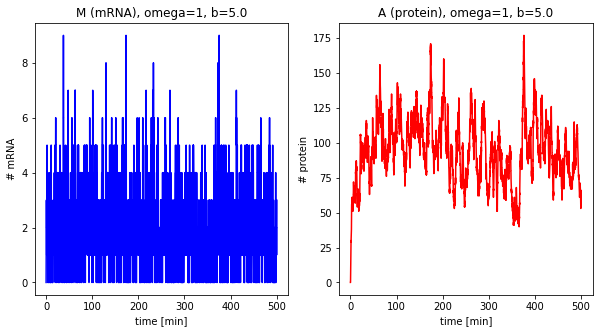

In [28]:
df = stochastic(tend=500, omega=1, b=5.0)
plot_results(df, omega=1, b=5.0)

## Effect of system size
Now we change the system size parameter $\Omega$.

[M0]=2.0; [A0]=100.0


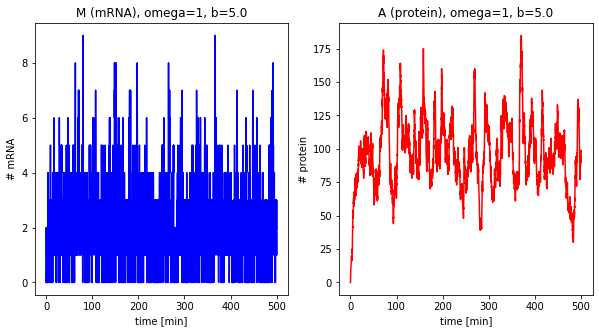

[M0]=2.0; [A0]=100.0


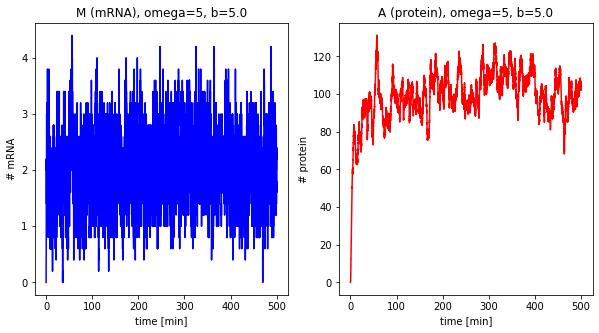

[M0]=2.0; [A0]=100.0


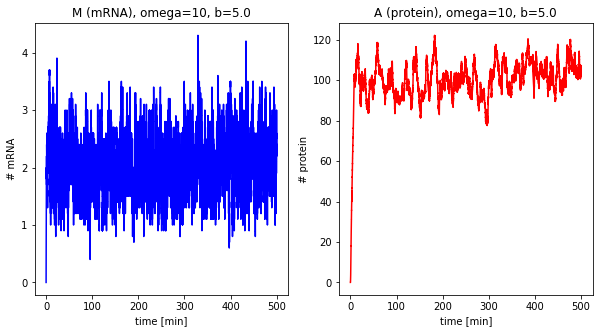

[M0]=2.0; [A0]=100.0


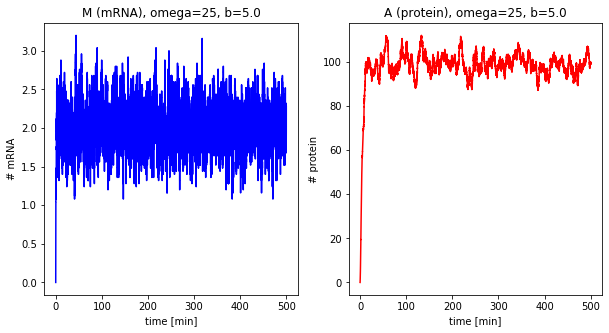

In [20]:
dfs_omega = []
for omega in [1, 5, 10, 25]:
    df = stochastic(500, omega=omega, b=5.0)
    plot_results(df, omega=omega, b=5.0)
    dfs_omega.append(df)

## Effect of the burst size
The next step is looking at the burst size of the system, i.e., how many proteins are translated per mRNA.

[M0]=10.0; [A0]=100.0


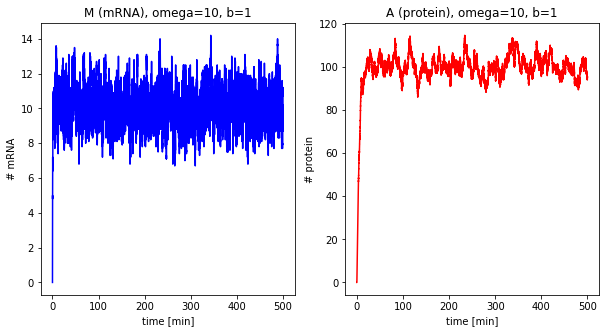

[M0]=2.0; [A0]=100.0


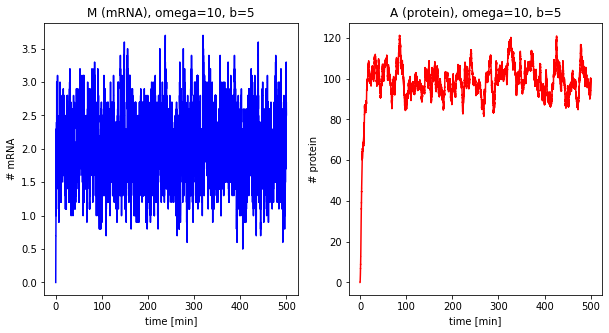

[M0]=0.25; [A0]=100.0


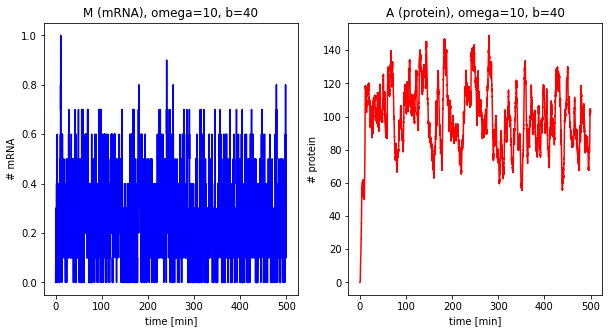

In [22]:
df_b = []
for b in [1, 5, 40]:
    df = stochastic(500, omega=10, b=b)
    plot_results(df, omega=10, b=b)

## Sampling trajectories from master equation

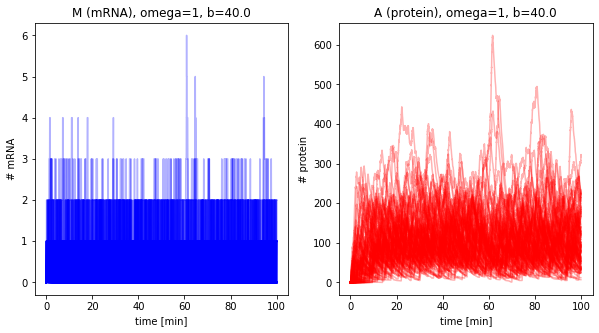

In [24]:
omega = 1
b = 40.0
dfs = []
for k in range(100):
    df = stochastic(100, omega=omega, b=b, info=False)
    dfs.append(df)
plot_results(dfs, omega=omega, b=b, alpha=0.3)

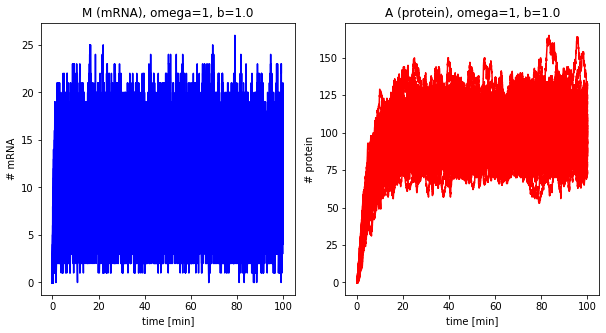

In [25]:
omega = 1
b = 1.0
dfs = []
for k in range(100):
    df = stochastic(100, omega=omega, b=b, info=False)
    dfs.append(df)
plot_results(dfs, omega=omega, b=b)